In [ ]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-_0zzarzp
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-_0zzarzp
  Created wheel for pyFTS: filename=pyFTS-1.6-cp36-none-any.whl size=210255 sha256=ac03d85275350ba15e104a06794b800a18a5911d24698e2d9364744a30aef670
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ppu4ckk/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
actual = [13055, 13563, 13867, 14696, 15460, 15311,15603,15861,16807, 16919, 16388, 15433, 15497,15145, 15163, 15984, 16859, 18150, 18970, 19328, 19337, 18876]

actual_series = pd.Series(actual)
df=round(actual_series.pct_change()*100,2)
df=df.drop(0)

df=df.reset_index(drop=True)

In [ ]:
data=df.values

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


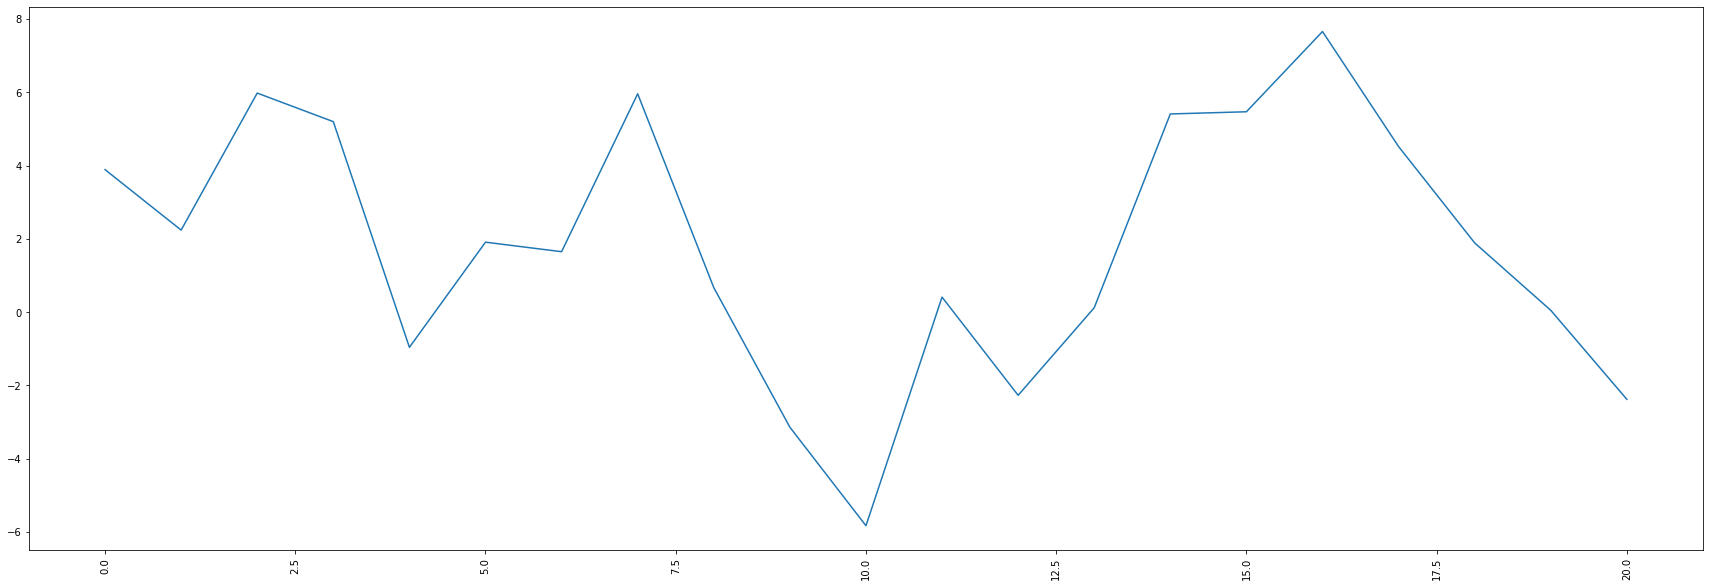

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[30,10])
plt.xticks(rotation=90)

plot(data)


### **Step 3**..................FTS

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


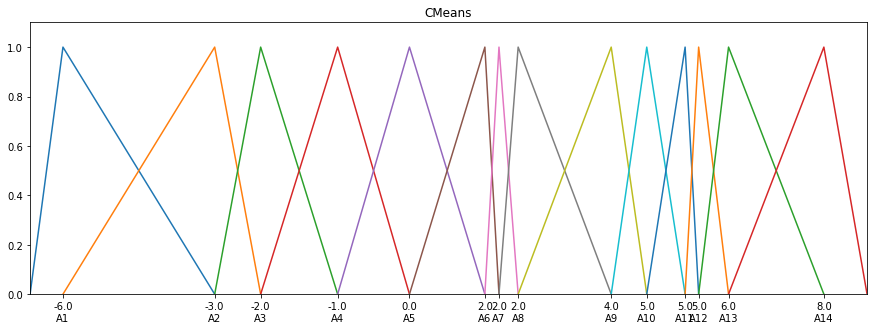

In [ ]:
from pyFTS.partitioners import CMeans
from pyFTS.partitioners import partitioner

fs = CMeans.CMeansPartitioner(data=data,npart=18)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [ ]:
data[0]

3.89

In [ ]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A9',
 'A8',
 'A13',
 'A11',
 'A4',
 'A7',
 'A6',
 'A13',
 'A5',
 'A2',
 'A1',
 'A5',
 'A3',
 'A5',
 'A12',
 'A12',
 'A14',
 'A10',
 'A7',
 'A5',
 'A3']

In [ ]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A9 -> A8', 'A8 -> A13', 'A13 -> A11', 'A11 -> A4', 'A4 -> A7', 'A7 -> A6', 'A6 -> A13', 'A13 -> A5', 'A5 -> A2', 'A2 -> A1', 'A1 -> A5', 'A5 -> A3', 'A3 -> A5', 'A5 -> A12', 'A12 -> A12', 'A12 -> A14', 'A14 -> A10', 'A10 -> A7', 'A7 -> A5']


In [ ]:
#Rule Gen
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A2 -> A1
A11 -> A4
A5 -> A12,A2,A3
A1 -> A5
A3 -> A5
A7 -> A5,A6
A4 -> A7
A10 -> A7
A9 -> A8
A13 -> A11,A5
A14 -> A10
A8 -> A13
A6 -> A13
A12 -> A12,A14



In [ ]:
import numpy as np
import math
from pyFTS import *

AttributeError: ignored

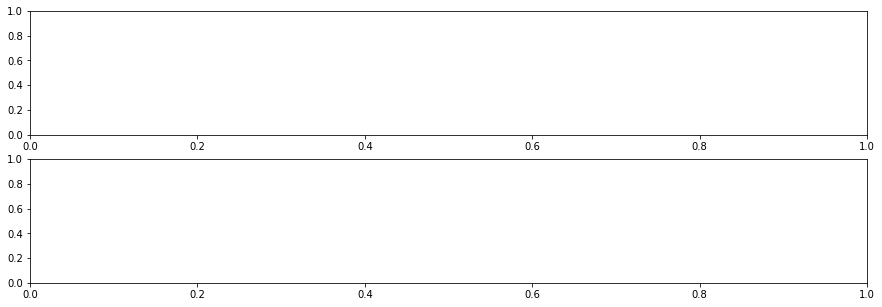

In [ ]:
from pyFTS.common import Util

Util.plot_rules(model, size=[15,5] , rules_by_axis=10)

In [ ]:
fuzzyfied = fs.fuzzyfy(6.25, method='maximum', mode='sets')

print(fuzzyfied)

A13


In [ ]:
model.predict([6.25])

[2.7565]

[2.24, 5.97, 2.7565, -0.96, 1.9, 0.9814999999999999, 5.97, 2.7565, -0.008333333333333304, -5.83, 0.313, -0.008333333333333304, 0.313, -0.008333333333333304, 6.550000000000001, 6.550000000000001, 4.52, 1.9, 0.9814999999999999, -0.008333333333333304, 0.313]
[14682.175200000001, 15809.982210000002, 15674.168240500001, 16010.410240000001, 17329.113999999998, 17007.4052115, 18187.949010000004, 17928.029311500002, 18486.159358333334, 17525.88453, 18083.223884000003, 16974.885308333338, 17100.056171000004, 16658.111708333334, 17771.794150000005, 18734.047200000005, 19383.12948, 20344.335, 21071.809605, 21259.028266666668, 21337.277291000002]


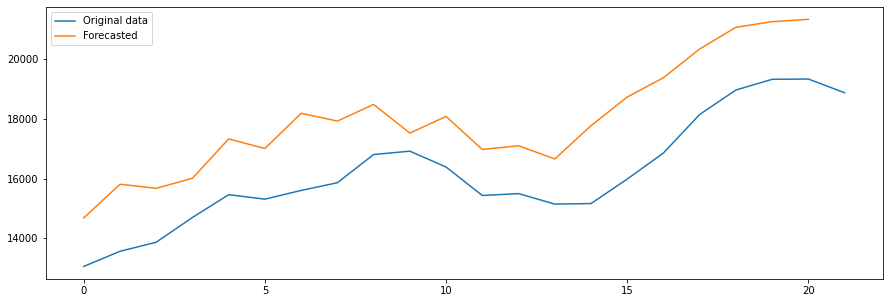

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
print(forecasts)
FX=[]
for i in range(0,len(forecasts)):
  FX.insert(i,actual_series[i]*1.1*(( forecasts[i]/100)+1))

print(FX)
orig, = plot(actual_series, label="Original data")
pred, = plot(FX, label="Forecasted")

legend(handles=[orig, pred])

In [ ]:
f=FX
d=actual_series.tolist()
print(f)
print(d)

[14682.175200000001, 15809.982210000002, 15674.168240500001, 16010.410240000001, 17329.113999999998, 17007.4052115, 18187.949010000004, 17928.029311500002, 18486.159358333334, 17525.88453, 18083.223884000003, 16974.885308333338, 17100.056171000004, 16658.111708333334, 17771.794150000005, 18734.047200000005, 19383.12948, 20344.335, 21071.809605, 21259.028266666668, 21337.277291000002]
[13055, 13563, 13867, 14696, 15460, 15311, 15603, 15861, 16807, 16919, 16388, 15433, 15497, 15145, 15163, 15984, 16859, 18150, 18970, 19328, 19337, 18876]


In [ ]:
ap=[1]*21
for i in range(0,20):
  ap[i]=(abs(d[i]-f[i])*100)/d[i]
print(mean(ap))
print(ap)

11.503168253968264
[12.464000000000011, 16.567000000000014, 13.032150000000009, 8.944000000000006, 12.089999999999986, 11.079650000000008, 16.567000000000025, 13.032150000000014, 9.990833333333338, 3.586999999999996, 10.344300000000018, 9.990833333333363, 10.344300000000025, 9.990833333333338, 17.205000000000034, 17.205000000000027, 14.971999999999998, 12.089999999999995, 11.079649999999994, 9.99083333333334, 1]


In [ ]:

s=mean(ap)
s

11.503168253968264